Made by Igor Malysh and Ekaterina Tyukavkina

# Task 6. Binary Logistic Regression

File **bank-additional-full.csv** contains records relevant to a direct marketing campaign of a Portuguese banking institution. The marketing campaign was executed through phone calls. Often, more than one call needs to be made to a single client before they either decline or agree to a term deposit subscription. The classification goal is to predict if the client will subscribe (yes/no) to the term deposit (variable y).

[Source](https://www.kaggle.com/code/kerneler/starter-bank-additional-full-csv-f1e01875-e)

**Variables:**

Bank client data
- age (numeric)
- job : type of job (categorical)
- marital : marital status (categorical)
- education (categorical)
- default: has credit in default? (categorical)
- housing: has housing loan? (categorical)
- loan: has personal loan? (categorical)

Related with the last contact of the current campaign
- contact: contact communication type (categorical)
- month: last contact month of year (categorical)
- day_of_week: last contact day of the week (categorical)
- duration: last contact duration, in seconds (numeric). 
*! Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.*

Other attributes
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical)

Social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target)
- y - has the client subscribed a term deposit? (binary: 'yes','no')

this project, I used LLM model as an assistant, not as the main author of the analysis.
Specifically:

I asked for code snippets for standard statistical tests (Shapiro–Wilk, D’Agostino–Pearson, Chi-square test,
Spearman correlation, partial correlation).

I requested recommendations for formatting graphs and Markdown comments so that the notebook is consistent.

All data loading, writing code, execution of code, interpretation of results, and final conclusions were done by me,
based on the dataset and the course requirements.


LLM was used as a support tool for:

Speed up the search for Python libraries,

Speeding up the writing of small pieces of code,

checking the correctness of statistical methods

Therefore, LLM was not the author of the work, but a helper for coding and structuring. The analysis, choice of variables, and interpretation remain my own.

Please complete the following tasks.

1. Select not less than 9 predictors. Out of them at least 3 predictors should be categorical. Prove that the selected predictors could be used simultaneously in one binary regression model. Formulate the research hypotheses which will be verified during the regression analysis.

In [167]:
# your code here

# i have replaced all ; to , at csv to fix it 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import roc_curve, auc
import warnings
from scipy.stats import pointbiserialr
warnings.filterwarnings('ignore')



df = pd.read_csv('bank-additional-full.csv', )
df.head(25)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [169]:
missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Percent of missing values' : missing})
missing

,Percent of missing values


In [170]:
# so we start our analysis with dependent variable exploration.

df['y'].describe()

count     41188
unique        2
top          no
freq      36548
Name: y, dtype: object

In [171]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [172]:
for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: int64
['age' 'duration' 'campaign' 'pdays' 'previous']

Type: object
['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome' 'y']

Type: float64
['emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']



In [173]:
num_vars = ['age', 'duration', 'campaign', 'pdays', 'previous',
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'day_of_week', 'poutcome', 'y']

In [174]:
df[num_vars]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [175]:
# vry slow operation
# sns.pairplot(df, hue='y')

In [176]:
# lets choose numeric variables


In [177]:


if set(df['y'].dropna().unique()) & {'yes','no'}:
    df['y'] = df['y'].map({'yes':1, 'no':0})

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'y' in num_cols:
    num_cols.remove('y')

rows = []
for col in num_cols:
    sub = df[['y', col]].dropna()
    n = len(sub)
    if n < 10:
        rows.append((col, np.nan, np.nan, n))
        continue
    r, p = pointbiserialr(sub['y'], sub[col])
    rows.append((col, r, p, n))

res = pd.DataFrame(rows, columns=['var','r_pb','pvalue','n'])

res['abs_r'] = res['r_pb'].abs()

cand = res[res['pvalue'] < 0.05].sort_values('abs_r', ascending=False).reset_index(drop=True)
selected_sorted_by_abs = cand['var'].tolist()

# used llm to sort and visualize data


print("\nCandidates (p < 0.05) sorted by |r_pb| (desc):")
print(cand[['var','r_pb','pvalue','n','abs_r']].to_string(index=False))
print("\nSelected numeric predictors (sorted by |r_pb|):")
print(selected_sorted_by_abs)


df['y'] = df['y'].map({1: 'yes', 0: 'no'})



Candidates (p < 0.05) sorted by |r_pb| (desc):
           var      r_pb        pvalue     n    abs_r
      duration  0.405274  0.000000e+00 41188 0.405274
   nr.employed -0.354678  0.000000e+00 41188 0.354678
         pdays -0.324914  0.000000e+00 41188 0.324914
     euribor3m -0.307771  0.000000e+00 41188 0.307771
  emp.var.rate -0.298334  0.000000e+00 41188 0.298334
      previous  0.230181  0.000000e+00 41188 0.230181
cons.price.idx -0.136211 9.318965e-170 41188 0.136211
      campaign -0.066357  2.007780e-41 41188 0.066357
 cons.conf.idx  0.054878  7.536665e-29 41188 0.054878
           age  0.030399  6.802136e-10 41188 0.030399

Selected numeric predictors (sorted by |r_pb|):
['duration', 'nr.employed', 'pdays', 'euribor3m', 'emp.var.rate', 'previous', 'cons.price.idx', 'campaign', 'cons.conf.idx', 'age']


<Axes: >

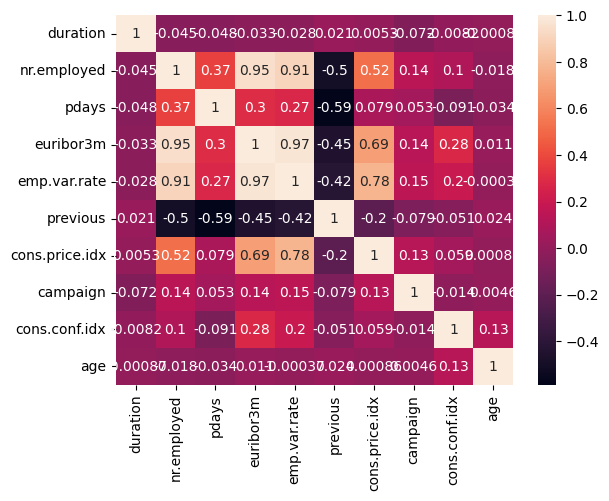

In [178]:
sns.heatmap(df[selected_sorted_by_abs].corr(), annot=True)

In [179]:
# Numeric variables are selected by a greedy algorithm:
# 1) variables with the strongest correlation with 'y'  were selected
# 2) then those with minimal correlation with each other were selected from the candidates
# thats why Variables such as 'euribor3m', 'previous' 'emp.var.rate' 'cons.price.idx' and others were not included, as they demonstrated high pairwise correlation with the already selected predictors


selected_num_vars = ['duration', 'nr.employed' , 'campaign', 'cons.conf.idx', 'age']


df[selected_num_vars]

,duration,nr.employed,campaign,cons.conf.idx,age
0,261,5191.0,1,-36.4,56
1,149,5191.0,1,-36.4,57
2,226,5191.0,1,-36.4,37
3,151,5191.0,1,-36.4,40
4,307,5191.0,1,-36.4,56
...,...,...,...,...,...
41183,334,4963.6,1,-50.8,73
41184,383,4963.6,1,-50.8,46
41185,189,4963.6,2,-50.8,56
41186,442,4963.6,1,-50.8,44


Категориальные кандидаты: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


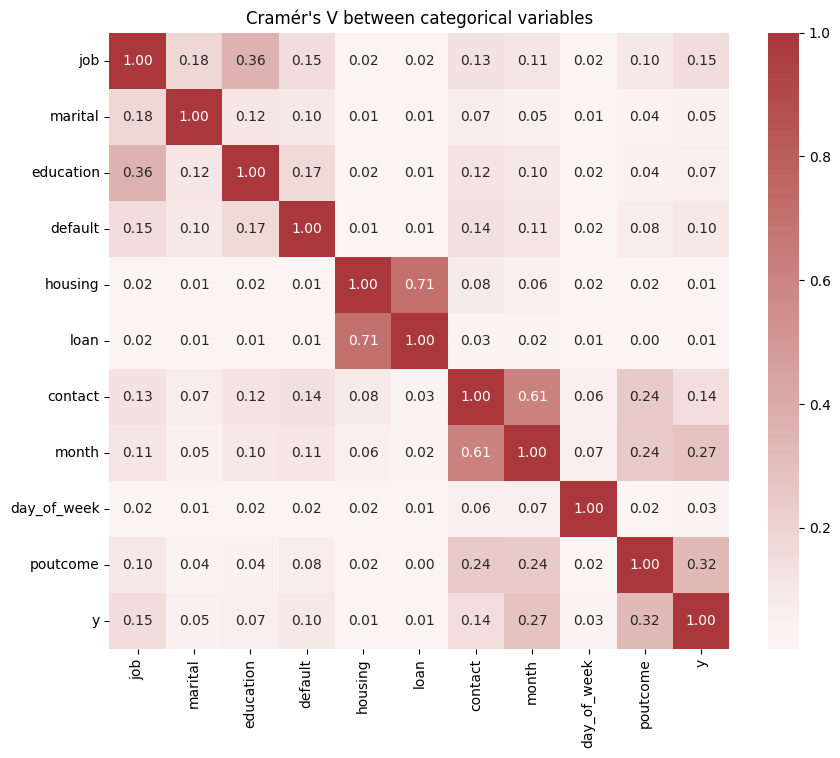

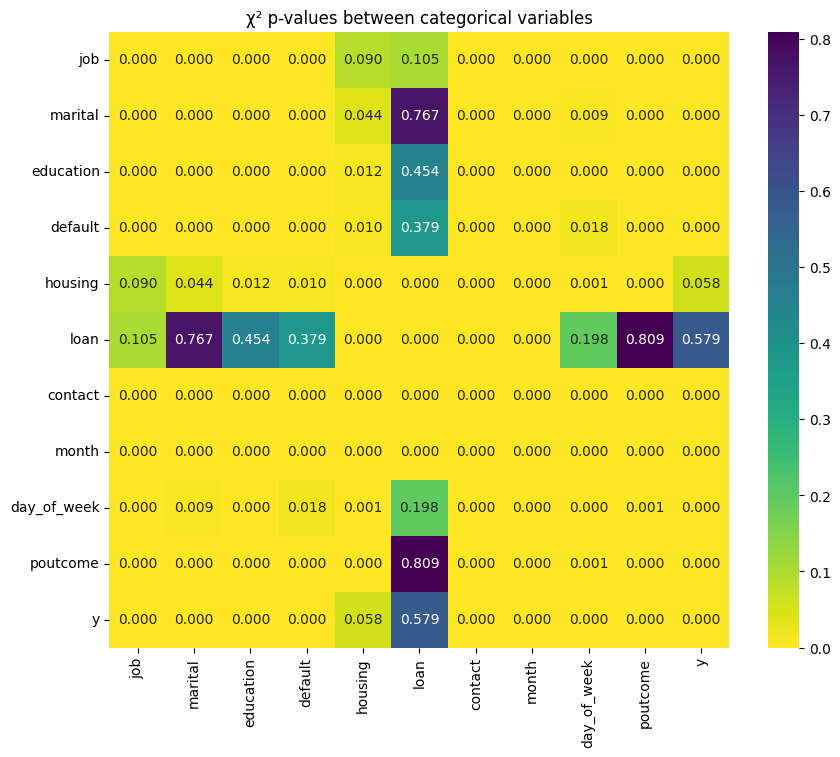

In [180]:
from scipy.stats import chi2_contingency
import math


# used llm to visualize matrix of cramers v and p values between cat variables


min_level_pct = 0.01
cat_corr_cutoff = 0.7

def merge_rare_levels(s, min_pct=min_level_pct):
    s = s.astype(str).copy()
    freqs = s.value_counts(normalize=True)
    rare = freqs[freqs < min_pct].index
    if len(rare) == 0:
        return s
    return s.replace({val: 'Other' for val in rare})

def cramers_v(x, y):
    table = pd.crosstab(x, y)
    if table.size == 0:
        return np.nan
    chi2, p, dof, ex = chi2_contingency(table, correction=False)
    n = table.sum().sum()
    min_dim = min(table.shape)
    if n == 0 or min_dim <= 1:
        return 0.0
    return math.sqrt(chi2 / (n * (min_dim - 1)))

cat_cols = [c for c in df.columns
            if (df[c].dtype == 'object' or str(df[c].dtype).startswith('category'))]


print("Категориальные кандидаты:", cat_cols)

df_cat = pd.DataFrame()
for c in cat_cols:
    df_cat[c] = merge_rare_levels(df[c], min_pct=min_level_pct)

n = len(cat_cols)
p_mat = pd.DataFrame(np.nan, index=cat_cols, columns=cat_cols)
v_mat = pd.DataFrame(np.nan, index=cat_cols, columns=cat_cols)

for i, a in enumerate(cat_cols):
    for j, b in enumerate(cat_cols):
        if j < i:
            p_mat.loc[a,b] = p_mat.loc[b,a]
            v_mat.loc[a,b] = v_mat.loc[b,a]
            continue

        table = pd.crosstab(df_cat[a], df_cat[b])

        if table.size == 0:
            p_val = np.nan
            v = np.nan
        else:
            try:
                chi2, p_val, dof, expected = chi2_contingency(table, correction=False)
            except Exception:
                p_val = np.nan
            v = cramers_v(df_cat[a], df_cat[b])
        p_mat.loc[a,b] = p_val
        v_mat.loc[a,b] = v

p_mat = p_mat.astype(float)
v_mat = v_mat.astype(float)


plt.figure(figsize=(10,8))
sns.heatmap(v_mat.astype(float), annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title("Cramér's V between categorical variables")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(p_mat.astype(float), annot=True, fmt='.3f', cmap='viridis_r')
plt.title("χ² p-values between categorical variables")
plt.show()



In [181]:
# lets get sorted cramers v of each var with y


s_y = df['y'].astype(str)
rows_vy = []
for c in cat_cols:
    v_y = cramers_v(df_cat[c], s_y)
   
    rows_vy.append((c, v_y))

v_with_y_df = pd.DataFrame(rows_vy, columns=['var','cramers_v_with_y']).sort_values('cramers_v_with_y', ascending=False).reset_index(drop=True)
print("\nCramér's V каждой категориальной переменной относительно y (отсортировано по убыванию):")
print(v_with_y_df.to_string(index=False))



Cramér's V каждой категориальной переменной относительно y (отсортировано по убыванию):
        var  cramers_v_with_y
          y          1.000000
   poutcome          0.320488
      month          0.274395
        job          0.152768
    contact          0.144773
    default          0.099354
  education          0.068472
    marital          0.054570
day_of_week          0.025195
    housing          0.011748
       loan          0.005154


In [182]:
# did not take 'month' 
# cat variables are selected by a greedy algorithm, looking for highest corr with y and smallest corr with other numeric vars, also considering p - value


selected_col_vars = ['poutcome', 'job', 'contact', 'default']

df[selected_col_vars]

,poutcome,job,contact,default
0,nonexistent,housemaid,telephone,no
1,nonexistent,services,telephone,unknown
2,nonexistent,services,telephone,no
3,nonexistent,admin.,telephone,no
4,nonexistent,services,telephone,no
...,...,...,...,...
41183,nonexistent,retired,cellular,no
41184,nonexistent,blue-collar,cellular,no
41185,nonexistent,retired,cellular,no
41186,nonexistent,technician,cellular,no


research hypotheses:

1) duration - duration of the last contact

H0: call duration has no effect on the probability of subscription

H1: longer call duration increases the probability of subscription

2) age - client age

H0: Age has no effect on the probability of subscription

H1: Age affects the probability of subscription

3) poutcome - outcome of the previous marketing campaign

H0: The result of the previous campaign has no effect on the current subscription probability

H1: The result of the previous campaign does affect current subscription probability

2. Build a binary logistic regression model. Dependent variable is `y`. Specify the regression equation (at least the linear part of it). Assess the goodness-of-fit of the model (statistical significance, accuracy, AUC). Create the ROC curve and describe it.

In [183]:
# your code here

df[selected_col_vars] = df[selected_col_vars].astype('category')
dummies = pd.get_dummies(df[selected_col_vars], drop_first=True, dtype=int)

X = pd.concat([df[selected_num_vars].copy(), dummies], axis=1)
y = df['y'].map({'yes':1, 'no':0})

dummies

,poutcome_nonexistent,poutcome_success,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,default_unknown,default_yes
0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
41184,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
41185,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
41186,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [184]:
X

,duration,nr.employed,campaign,cons.conf.idx,age,poutcome_nonexistent,poutcome_success,job_blue-collar,job_entrepreneur,job_housemaid,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,default_unknown,default_yes
0,261,5191.0,1,-36.4,56,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,149,5191.0,1,-36.4,57,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,226,5191.0,1,-36.4,37,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,151,5191.0,1,-36.4,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,307,5191.0,1,-36.4,56,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,334,4963.6,1,-50.8,73,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
41184,383,4963.6,1,-50.8,46,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
41185,189,4963.6,2,-50.8,56,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
41186,442,4963.6,1,-50.8,44,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [185]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [186]:
x_mult_constant = sm.add_constant(X)

model1 = sm.Logit(y, x_mult_constant).fit()
print(model1.summary())


         Current function value: 0.216939
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41166
Method:                           MLE   Df Model:                           21
Date:                Fri, 07 Nov 2025   Pseudo R-squ.:                  0.3837
Time:                        03:20:14   Log-Likelihood:                -8935.3
converged:                      False   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   64.0316      1.494     42.853      0.000      61.103      66.960
duration                 0.0045   7

In [187]:
# regression equation 

l = []
for (param, index) in zip(model1.params[1:], model1.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))

print('logit(p) = {:2f} + {}'.format(model1.params[0], ' + '.join(l)))

logit(p) = 64.031610 + 0.00*duration + -0.01*nr.employed + -0.04*campaign + 0.03*cons.conf.idx + -0.00*age + 0.50*poutcome_nonexistent + 1.85*poutcome_success + -0.46*job_blue-collar + -0.26*job_entrepreneur + -0.12*job_housemaid + -0.07*job_management + 0.32*job_retired + -0.14*job_self-employed + -0.32*job_services + 0.27*job_student + -0.07*job_technician + -0.01*job_unemployed + 0.00*job_unknown + -0.67*contact_telephone + -0.40*default_unknown + -19.53*default_yes


goodness of fit of the model

In [188]:
print('R^2 = {:f}'.format(model1.prsquared))
print('Model significance = {:f}'.format(model1.llr_pvalue))

R^2 = 0.383747
Model significance = 0.000000


Model is statistically significant. It explains 38.4% of the variation of the dependent variable.

In [189]:


def yes_no(p_value, level = 0.05):
    if abs(p_value) < level:
        return 'significant'
    else:
        return 'non-significant'


pvals = pd.DataFrame()
pvals['p_values'] = model1.pvalues[1:]
pvals['5% level']= pvals['p_values'].apply(yes_no)
pvals['p_values'] = pvals['p_values'].map('{:.3f}'.format)
pvals['Features'] = model1.params.index[1:]
pvals.set_index('Features',inplace=True)
pvals

,p_values,5% level
Features,,
duration,0.000,significant
nr.employed,0.000,significant
campaign,0.000,significant
cons.conf.idx,0.000,significant
age,0.734,non-significant
poutcome_nonexistent,0.000,significant
poutcome_success,0.000,significant
job_blue-collar,0.000,significant
job_entrepreneur,0.036,significant


In [190]:
f'Statistically significant model parameters: {model1.pvalues[model1.pvalues < 0.05].index.values}'

"Statistically significant model parameters: ['const' 'duration' 'nr.employed' 'campaign' 'cons.conf.idx'\n 'poutcome_nonexistent' 'poutcome_success' 'job_blue-collar'\n 'job_entrepreneur' 'job_retired' 'job_services' 'job_student'\n 'contact_telephone' 'default_unknown']"

In [191]:
f'Statistically nonsignificant model parameters: {model1.pvalues[model1.pvalues > 0.05].index.values}'

"Statistically nonsignificant model parameters: ['age' 'job_housemaid' 'job_management' 'job_self-employed'\n 'job_technician' 'job_unemployed' 'job_unknown' 'default_yes']"

In [192]:
vifs = np.array([vif(model1.model.exog, i) for i in range(model1.model.exog.shape[1])])

In [193]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model1.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
20,1.000726,default_yes
0,1.009140,duration
2,1.030485,campaign
17,1.033842,job_unknown
16,1.074252,job_unemployed
9,1.093280,job_housemaid
12,1.100293,job_self-employed
8,1.111366,job_entrepreneur
19,1.124091,default_unknown
14,1.131586,job_student


There are no VIF values greater than 10. There is no multicollinearity problem.

ROC curve

In [194]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

fpr, tpr, _ = roc_curve(y, model1.predict())
roc_auc = auc(fpr, tpr)
roc_auc

0.9251944036515041

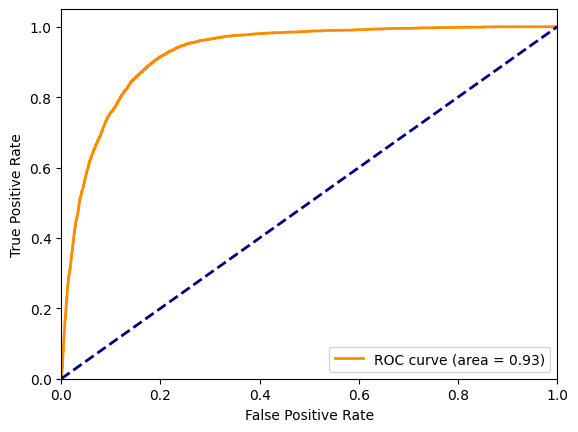

In [195]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

roc curve descripiton

AUC = 0.93

R^2 = 0.38

p-value = 0

The area under the ROC is 0.93. According to the lecture, AUC = 0.5 corresponds to a random classifier, while values closer to 1.0 indicate better discrimination between positive and negative classes. Thus, AUC = 0.93 indicates excellent discriminatory ability of the fitted model.

the curves closeness to the top-left corner shows the model achieves high sensitivity for low false positive rates

3. Assess the statistical significance of the regression coefficients. Describe the relationships between each predictor and dependent variable in detail. This is very important point of the task. We should understand clearly from the analysis which predictors influence the choice of the clients and how.

In [196]:
# your code here


def yes_no(p_value, level = 0.05):
    if abs(p_value) < level:
        return 'significant'
    else:
        return 'non-significant'


pvals = pd.DataFrame()
pvals['p_values'] = model1.pvalues[1:]
pvals['5% level']= pvals['p_values'].apply(yes_no)
pvals['p_values'] = pvals['p_values'].map('{:.3f}'.format)
pvals['Features'] = model1.params.index[1:]
pvals.set_index('Features',inplace=True)
pvals

,p_values,5% level
Features,,
duration,0.000,significant
nr.employed,0.000,significant
campaign,0.000,significant
cons.conf.idx,0.000,significant
age,0.734,non-significant
poutcome_nonexistent,0.000,significant
poutcome_success,0.000,significant
job_blue-collar,0.000,significant
job_entrepreneur,0.036,significant


In [197]:

ci = model1.conf_int()
res_table = pd.DataFrame({
    'coef': model1.params,
    'std_err': model1.bse,
    'z': model1.tvalues,
    'p_value': model1.pvalues,
    'ci_low': ci[0],
    'ci_high': ci[1],
})
res_table

,coef,std_err,z,p_value,ci_low,ci_high
const,64.031610,1.494213,42.853081,0.000000e+00,61.103007,66.960213
duration,0.004547,0.000072,63.380072,0.000000e+00,0.004406,0.004688
nr.employed,-0.012942,0.000296,-43.660413,0.000000e+00,-0.013522,-0.012361
campaign,-0.042498,0.011491,-3.698303,2.170454e-04,-0.065020,-0.019975
cons.conf.idx,0.030962,0.003564,8.686352,3.742647e-18,0.023976,0.037948
age,-0.000729,0.002150,-0.339333,7.343587e-01,-0.004943,0.003484
poutcome_nonexistent,0.500526,0.060252,8.307176,9.800658e-17,0.382434,0.618619
poutcome_success,1.848110,0.083047,22.253832,1.035555e-109,1.685341,2.010879
job_blue-collar,-0.459761,0.063877,-7.197613,6.127575e-13,-0.584958,-0.334565
job_entrepreneur,-0.255964,0.121748,-2.102418,3.551668e-02,-0.494585,-0.017343


In [198]:
def print_coef_info(var):
    b = model1.params[var]
    se = model1.bse[var]
    z = b / se
    p_two = model1.pvalues[var]
    or_ = np.exp(b)
    ci_b = model1.conf_int().loc[var]
    ci_or = np.exp(ci_b)
    print(f"\nVariable: {var}")
    print(f"  coef (beta) = {b:.4f}, SE = {se:.4f}, z = {z:.3f}")
    print(f"  two-sided p-value = {p_two:.4g}")
    print(f"  OR = {or_:.4f}, 95% CI for OR = [{ci_or[0]:.4f}, {ci_or[1]:.4f}]")
    return b, se, z, p_two, or_, ci_or


print_coef_info('duration')


Variable: duration
  coef (beta) = 0.0045, SE = 0.0001, z = 63.380
  two-sided p-value = 0
  OR = 1.0046, 95% CI for OR = [1.0044, 1.0047]


(np.float64(0.004546924780167341),
 np.float64(7.174060666066562e-05),
 np.float64(63.38007150781954),
 np.float64(0.0),
 np.float64(1.0045572777280567),
 0    1.004416
 1    1.004699
 Name: duration, dtype: float64)

In [199]:
# used llm to visualize p-value of group lr test for poutcome


pout_cols = ['poutcome_nonexistent', 'poutcome_success']

X_reduced = X.drop(columns=pout_cols)

reduced = sm.Logit(y, X_reduced).fit(disp=False)

lr_stat = 2 * (model1.llf - reduced.llf)
df_lr = len(pout_cols)
p_lr = stats.chi2.sf(lr_stat, df_lr)

print(f"LR stat = {lr_stat:.3f}, df = {df_lr}, p = {p_lr:.4g}")
if p_lr < 0.05:
    print(f"=> reject H0: poutcome (as a group) is significant. {p_lr}")
else:
    print(f"=> do NOT reject H0: no evidence that poutcome matters as a group. {p_lr}")


LR stat = 3565.598, df = 2, p = 0
=> reject H0: poutcome (as a group) is significant. 0.0


hypotheses check


1) duration - duration of the last contact

reject H0 - because p value for duration is less than 0.05

2) age - client age

do not reject H0 - because p value for age is greater than 0.05

3) poutcome - outcome of the previous marketing campaign

reject H0, poutcome is significant - because p value is less than 0.05

4. Do the model diagnostics. Conduct cross-validation of the model and describe the results obtained.

Train-test split is a model validation procedure that reveals how the model performs on new data. We will split the dataframe into two random samples (80% and 20%).

In [200]:
# your code here

from sklearn.model_selection import train_test_split
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x_mult_constant, y, test_size = 0.2, random_state = 0)
x_train

,const,duration,nr.employed,campaign,cons.conf.idx,age,poutcome_nonexistent,poutcome_success,job_blue-collar,job_entrepreneur,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,default_unknown,default_yes
29321,1.0,501,5099.1,3,-47.1,40,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
23925,1.0,59,5228.1,2,-36.1,33,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39148,1.0,292,5008.7,2,-34.8,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12078,1.0,76,5228.1,1,-41.8,29,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
41021,1.0,168,4963.6,2,-49.5,29,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,1.0,559,5228.1,2,-36.1,52,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32103,1.0,166,5099.1,1,-46.2,56,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30403,1.0,427,5099.1,3,-47.1,29,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21243,1.0,111,5228.1,1,-36.1,35,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
x_test

,const,duration,nr.employed,campaign,cons.conf.idx,age,poutcome_nonexistent,poutcome_success,job_blue-collar,job_entrepreneur,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,default_unknown,default_yes
15500,1.0,635,5228.1,3,-42.7,39,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29034,1.0,248,5099.1,2,-47.1,55,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11199,1.0,207,5228.1,1,-41.8,39,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
22247,1.0,176,5228.1,7,-36.1,56,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
27180,1.0,271,5195.8,1,-42.0,49,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34422,1.0,210,5099.1,2,-46.2,34,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14868,1.0,558,5228.1,6,-42.7,46,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
40057,1.0,346,4991.6,1,-40.3,34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24321,1.0,275,5195.8,1,-42.0,45,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [202]:
y_train

29321    0
23925    0
39148    1
12078    0
41021    0
        ..
20757    0
32103    0
30403    1
21243    0
2732     0
Name: y, Length: 32950, dtype: int64

In [203]:
y_test

15500    1
29034    0
11199    0
22247    0
27180    0
        ..
34422    0
14868    0
40057    1
24321    0
37567    0
Name: y, Length: 8238, dtype: int64

In [204]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()

lr.fit(x_train, y_train)
pred = lr.predict(x_train)
clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

tn, fp, fn, tp = confusion_matrix(y_train, pred).ravel()
sensitivity_train = tp / (tp + fn)
specificity_train = tn / (tn + fp)

print(f"Sensitivity = {sensitivity_train:.4f}")
print(f"Specificity = {specificity_train:.4f}")


Train Result:
Accuracy Score: 89.63%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.907698     0.617943  0.896328      0.762820      0.874976
recall         0.983099     0.214727  0.896328      0.598913      0.896328
f1-score       0.943895     0.318708  0.896328      0.631301      0.873294
support    29229.000000  3721.000000  0.896328  32950.000000  32950.000000
_______________________________________________
Confusion Matrix: 
 [[28735   494]
 [ 2922   799]]

Sensitivity = 0.2147
Specificity = 0.9831


In [205]:
pred = lr.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))

print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
sensitivity_train = tp / (tp + fn)
specificity_train = tn / (tn + fp)

print(f"Sensitivity = {sensitivity_train:.4f}")
print(f"Specificity = {specificity_train:.4f}")


Train Result:
Accuracy Score: 90.17%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.913375    0.649315  0.901675     0.781345      0.883917
recall        0.982511    0.257889  0.901675     0.620200      0.901675
f1-score      0.946682    0.369159  0.901675     0.657921      0.882256
support    7319.000000  919.000000  0.901675  8238.000000   8238.000000
_______________________________________________
Confusion Matrix: 
 [[7191  128]
 [ 682  237]]

Sensitivity = 0.2579
Specificity = 0.9825


The model demonstrates stable behavior on the training and test sets: accuracy of 89% (training) and 90% (testing), and specificity of 98% (both training and testing). This indicates the absence of overfitting in accuracy. However, a drawback is low sensitivity for the positive class: 21% (training) and 25% (testing). As a result, the model has many false positives, and its high accuracy is primarily due to the correct classification of negative cases.

5. Make final conclusions based on the results of the regression analysis. Which of the data analysis results were expected for you, and which were unexpected?

In [206]:
# your code here

The model demonstrates stable behaviour on training and test sets: accuracy 89% (training) and 90% (testing), and specificity 98% on both sets. This indicates no obvious overfitting in terms of accuracy. However, a major drawback is the low sensitivity for the positive class: 21% (training) and 25% (testing). the model misses many actual positives (many false negatives), the high accuracy is mainly due to correct classification of negative cases.

The model showed a statistically significant and interpretable result: key factors such as contact duration and the outcome of the previous campaign (poutcome_success) were positively associated with the likelihood of subscription.

Expected findings:
1) duration - reject H0

2) poutcome - reject H0

Unexpected findings:
1) age - client age: do not reject H0 
This is unexpected if an age effect was anticipated. May be it is masked by other predictors.


Comments on the task and principles of its assessment:

- All points of the task must be accompanied by _executed_ code fragments.
- All results of the code execution (statistics, graphs, tables) should be commented, conclusions in the written form should be made based on them.
- If you have completed this task, you will receive 8 points (excellent grade). To get a higher grade (9 or 10), you need to go beyond the proposed task. For example, use additional regression methods or create different specifications of the model and compare them.
- This task consists of five parts, the weight of each part in the overall assessment is as follows:
    1. 10%
    2. 20%
    3. 40%
    4. 20%
    5. 10%
- The task can be completed individually or in a group of 2 students, the assessment criteria will be the same.
- If the task is completed by 2 students, then only one of the students should upload the work to SmartLMS.
- The name of the file uploaded to SmartLMS should include the last name(s) of the author(s) of the work.
- If you use AI in the work, you must indicate where and how exactly it was used.

### Please upload the Jupyter Notebook with comments and answers in SmartLMS. The deadline is 6 November 23:55. 